In [1]:
from dlsr import *

In [2]:
helpers.config(True)

In [3]:
training_data = helpers.get_training_data(num=25600, image_size=32)

loading validation...
finished loading validation
loading training...
finished loading training


In [4]:
model = models.basic()
model, history = train(
    model,
    training_data,
    batch_size=256,
    epochs=1000,
    loss_fn=losses.vgg_style_loss,
    patience=50,
    n=1e-6,
)

Epoch 1/1000
100/100 [==============================] - 23s 155ms/step - loss: 0.0020 - accuracy: 0.5099 - ssim_loss: 0.5839 - val_loss: 0.0018 - val_accuracy: 0.5529 - val_ssim_loss: 0.6189
Epoch 2/1000
100/100 [==============================] - 14s 143ms/step - loss: 0.0020 - accuracy: 0.5091 - ssim_loss: 0.5830 - val_loss: 0.0018 - val_accuracy: 0.5528 - val_ssim_loss: 0.6179
Epoch 3/1000
100/100 [==============================] - 14s 143ms/step - loss: 0.0019 - accuracy: 0.5094 - ssim_loss: 0.5820 - val_loss: 0.0018 - val_accuracy: 0.5530 - val_ssim_loss: 0.6166
Epoch 4/1000
100/100 [==============================] - 14s 143ms/step - loss: 0.0019 - accuracy: 0.5100 - ssim_loss: 0.5804 - val_loss: 0.0017 - val_accuracy: 0.5533 - val_ssim_loss: 0.6147
Epoch 5/1000
100/100 [==============================] - 14s 143ms/step - loss: 0.0018 - accuracy: 0.5130 - ssim_loss: 0.5783 - val_loss: 0.0017 - val_accuracy: 0.5597 - val_ssim_loss: 0.6121
Epoch 6/1000
100/100 [=======================

In [5]:
import os
from dlsr.data import DIV2K
from PIL import Image
import numpy as np

directory = "output/vgg_style"
num_to_predict = 10
predict_size = 192

try:
    os.makedirs(directory)
except FileExistsError:
    # directory already exists
    pass

callback_ds = DIV2K(type="valid").dataset(batch_size=1, random_transform=False, crop_images=True, image_size=predict_size)
callback_ds = callback_ds.map(lambda a, b: a)
callback_ds = callback_ds.take(num_to_predict)

model.save(f"{directory}/generator.h5")

upscaled = upscale(model, callback_ds, batch_size=num_to_predict)

for i , x in enumerate(upscaled):
    im = Image.fromarray(np.uint8(x))
    im.save(os.path.join(directory, f"converted{i}.png"), format="png")

model.save("./saved-models/vgg_style.h5")

1/1 [==============================] - 0s 396ms/step


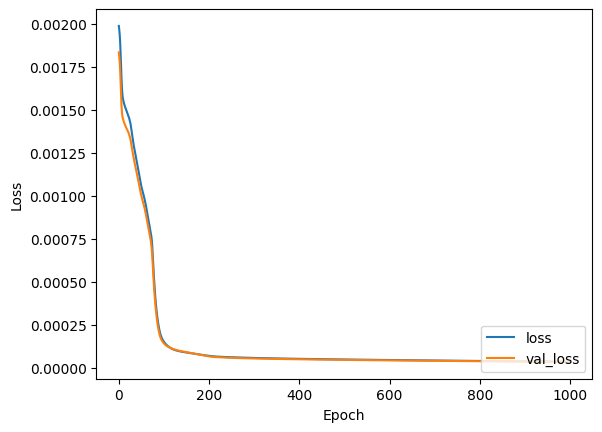

In [6]:
helpers.plot_history(history)